In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6"})

In [7]:
path = 'raw/Data.csv'
survey_df = pd.read_csv(path, sep=';', index_col='ID')
survey_df

,Trip Frequency,Age,Gender,Seat sit 1,Seat sit 2,Seat sit 3
ID,,,,,,
1,1-3 times per week,25-34,Male,8,30,4
2,1-3 times per week,35-44,Female,32,37,39
3,More than 4 times per week,25-34,Female,19,14,14
4,1-3 times per week,18-24,Male,32,16,20
5,Once a month,25-34,Male,10,23,39
...,...,...,...,...,...,...
509,1-3 times per week,18-24,Female,9,15,21
510,1-3 times per week,35-44,Male,9,12,10
511,More than 4 times per week,25-34,Female,30,12,17


In [15]:
survey_df['Seat sit 3'].isna().sum()

0

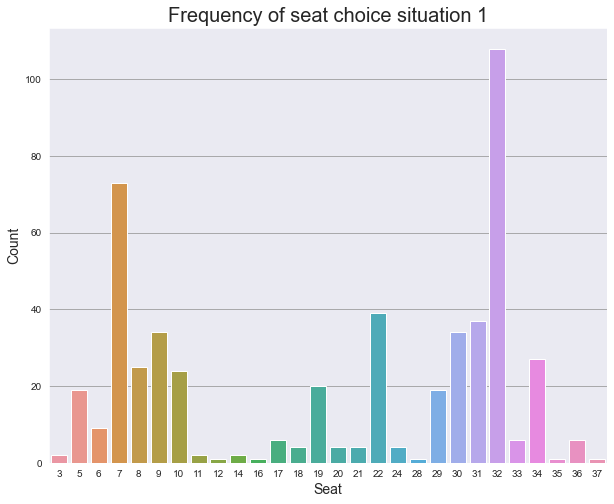

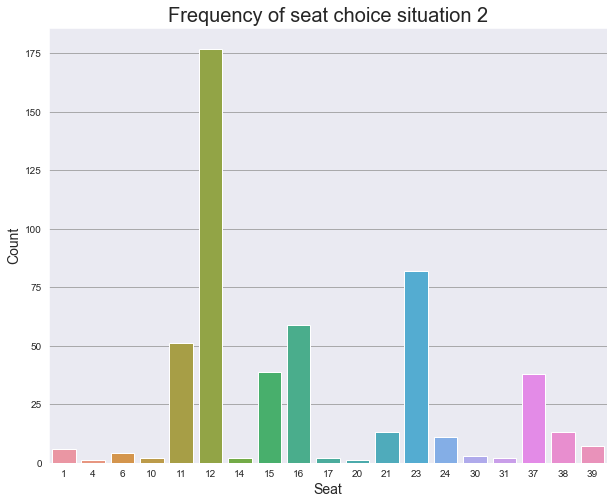

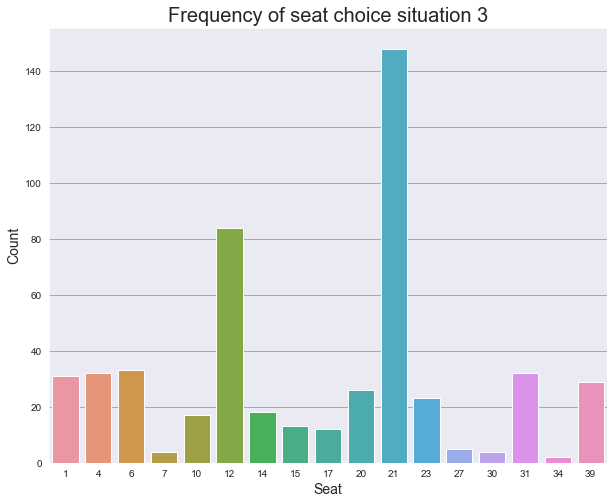

In [25]:
situations = [1, 2, 3]

for situation in situations:
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
    ax.set_title(f'Frequency of seat choice situation {situation}', fontsize=20)
    ax.set_xlabel('Seat', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    fig.savefig(f'figures/frequency_sit_{situation}.png')

In [28]:
grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
       2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
       21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
       22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

grid = np.array(grid).reshape(4,10)
grid

array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20],
       [21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
       [22, 24, 26, 28, 30, 32, 34, 36, 38, 40]])